# Fractional Brownian Motion
Fractional brownian motion is defined by the stochastic integral,

$
\begin{align}
Z^H_t = \frac{1}{C^H} \int_{-\infty}^{\infty} \left[ (t-s)^{H-\frac{1}{2}}_+ - (-s)^{H-\frac{1}{2}}_+ \right] dB_s
\end{align}
$

where, </br>

$
\begin{align}
C^H = \Bigg\{ \int_{-\infty}^0  \left[ (t-s)^{H-\frac{1}{2}}_+ - (-s)^{H-\frac{1}{2}}_+ \right] ds + \frac{1}{2H} \Bigg\} ^{\frac{1}{2}}
\end{align}
$

Then mean, variance, covariance are given by,

$
\begin{align}
&\text{E}[Z^H_t] = 0 \\
&\text{Var}[Z_t^H] = t^{2H} \\
&\text{Cov}[Z^H_t Z^H_s] = R^H(t,s) = \frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}],
\end{align}
$

where $t > s$.

Let $\Delta Z^H_t$ denote an increment of fractional brownian noise, then the mean, variance and autocovariance separated in time by $n$ is given by,<br>

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z_t^H] = \Delta t^{2H} \\
&\rho^H_n = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Fractional brownian motion is stationary, so for $t > s$

$
\begin{align}
Z^H_{s+t} - Z^H_s \sim Z^H_s
\end{align}
$

and self similar,

$
\begin{align}
Z^H_{at} \sim a^H Z_t
\end{align}
$

It is easy to see that,

$
\begin{align}
&\text{Var}[Z_{at}^H] = a^{2H}t^{2H} = a^{2H}\text{Var}[Z_{t}^H]\\
&\text{Cov}[Z^H_{at} Z^H_{as}] = a^{2H}\frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}] = a^{2H}\text{Cov}[Z^H_{t} Z^H_{s}],
\end{align}
$

Two methods are used to simulate fractional brownian motion. The Cholesky method is uses Cholesky decomposition to</br>
to decompose the fractional brownian motion covariance matrix for a bivariate Gaussian distribution and the FFT method uses</br>
Fast-Fourier transforms in a similar matter. The FFT method is much faster but is inaccurate for values of $H$ near 1.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib.plot_config import PlotDataType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [20]:
Δt = 1.0
npts = 1024

def fft_samples(H_vals, npts):
    samples = numpy.array([fbm.generate_fft(H_vals[0], npts)])
    for H in H_vals[1:]:
        samples = numpy.append(samples, numpy.array([fbm.generate_fft(H, npts)]), axis=0)
    return samples

def cholesky_samples(H_vals, npts):
    samples = numpy.array([fbm.generate_cholesky(H_vals[0], npts)])
    for H in H_vals[1:]:
        samples = numpy.append(samples, numpy.array([fbm.generate_cholesky(H, npts)]), axis=0)
    return samples

## Fractional Brownian Noise

Fractional brownian noise is generated from brownian noise. The Noise here is used as the input for</br>
the following simulations for comparison.

In [3]:
dB = bm.noise(npts+1)

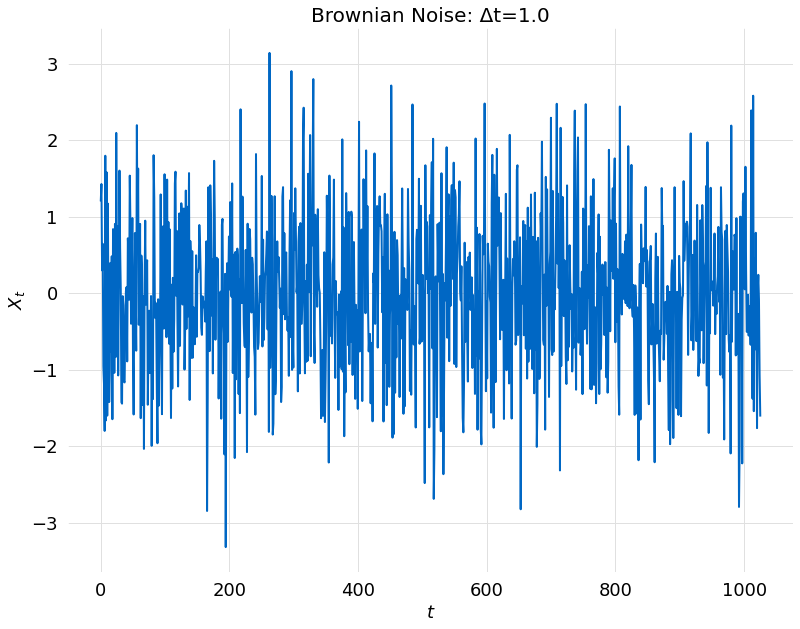

In [4]:
title = f"Brownian Noise: Δt={Δt}"
plots.curve(dB, title=title, data_type=PlotDataType.TIME_SERIES)

### Cholesky Fractional Brownian Noise
This noise is created using the Cholesky algorithm. Fractional brownian motion is created by summing fractional nrownian noise.

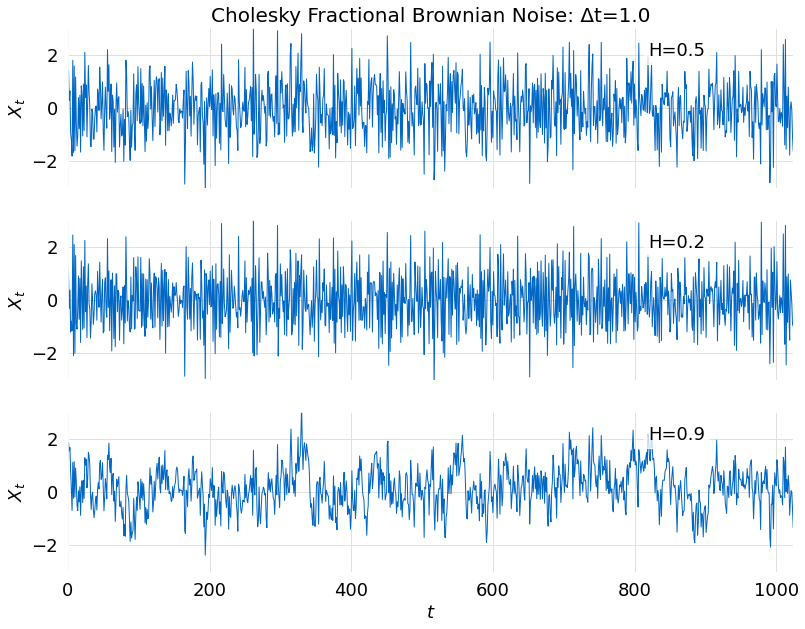

In [5]:
H = [0.5, 0.2, 0.9]
samples = [fbm.cholesky_noise(H[0], npts, dB=dB),
           fbm.cholesky_noise(H[1], npts, dB=dB),
           fbm.cholesky_noise(H[2], npts, dB=dB)]
labels = [f"H={H[0]}", f"H={H[1]}", f"H={H[2]}"]
title = f"Cholesky Fractional Brownian Noise: Δt={Δt}"
plots.stack(samples, [-3.0, 3.0], title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

### FFT Fractional Brownian Noise
This noise is created using the FFT algorothm. It generated from brownian noise. This noise is used the input for the following</br>
simulations for comparison. Fractional brownian motion is created by summing fractional brownian noise.

In [6]:
dB = bm.noise(2*npts)

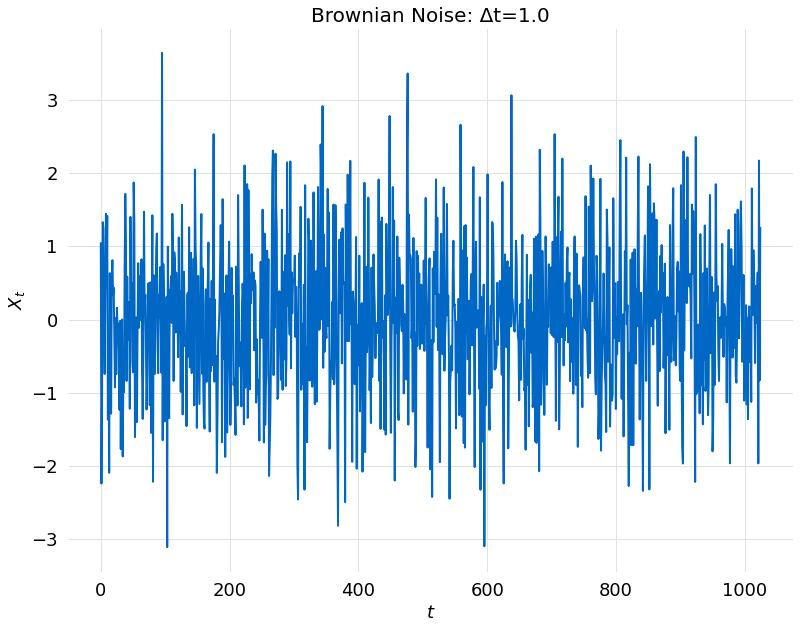

In [7]:
title = f"Brownian Noise: Δt={Δt}"
plots.curve(dB[:npts], title=title, data_type=PlotDataType.TIME_SERIES)

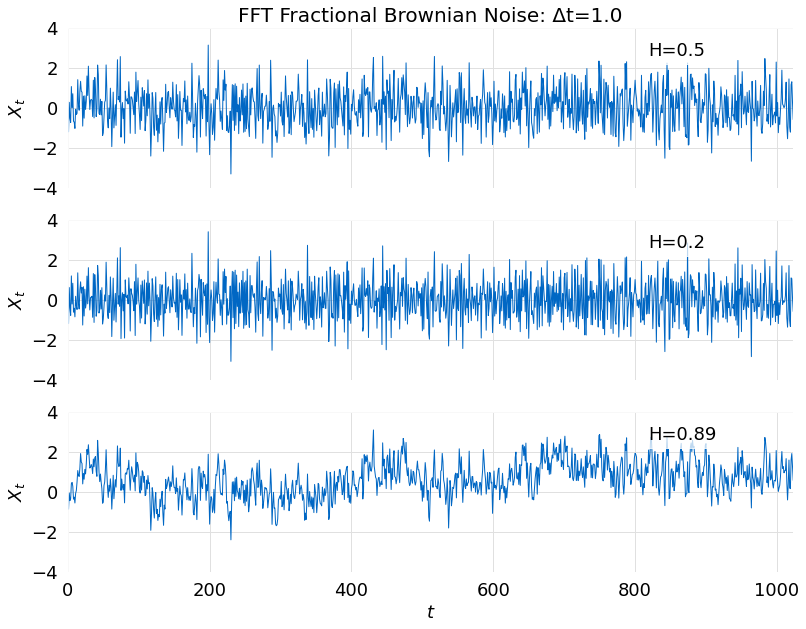

In [8]:
H = [0.5, 0.2, 0.89]
samples = [fbm.fft_noise(H[0], npts, dB=dB),
           fbm.fft_noise(H[1], npts, dB=dB),
           fbm.fft_noise(H[2], npts, dB=dB)]
labels = [f"H={H[0]}", f"H={H[1]}", f"H={H[2]}"]
title = f"FFT Fractional Brownian Noise: Δt={Δt}"
plots.stack(samples, [-4.0, 4.0], title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

## Cholesky Fractional Brownian Motion
Brownian motion created using the Cholesky method. This method is slower than the FFT method but performs well for all values of H.

In [9]:
H_vals = [0.55, 0.6, 0.7, 0.8, 0.9, 0.92]
samples = cholesky_samples(H_vals, npts)

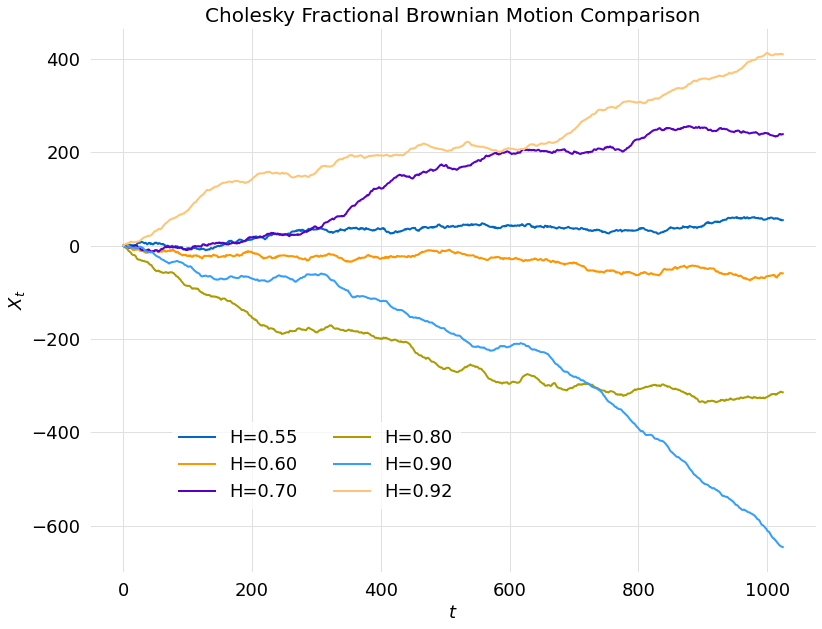

In [10]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.comparison(samples, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

In [11]:
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5]
samples = cholesky_samples(H_vals, npts)

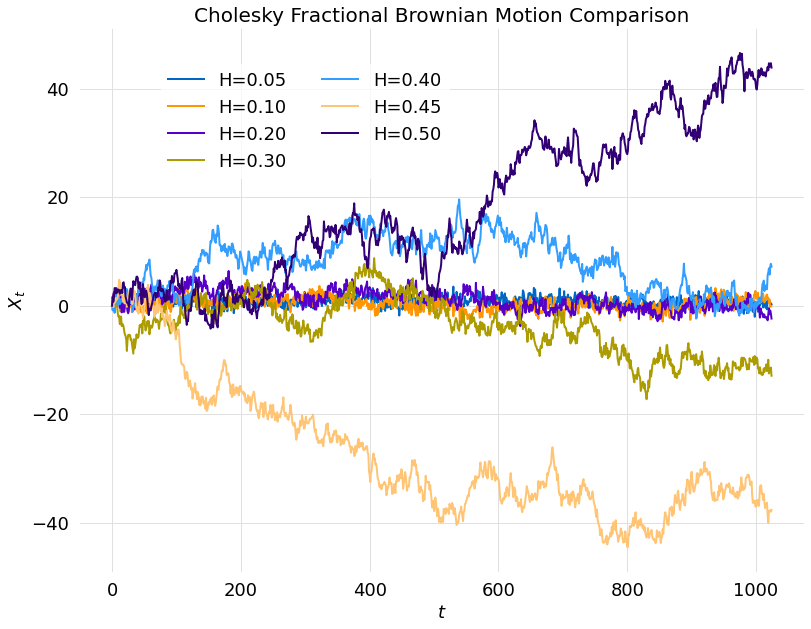

In [12]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.comparison(samples, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

## FFT Brownian Motion
Fractional brownian motion created using the FFT method. This mthod is the fastest and will be used in analysis going forward but has problems for H near 1.

In [13]:
H_vals = [0.55, 0.6, 0.7, 0.8, 0.89]
samples = fft_samples(H_vals, npts)

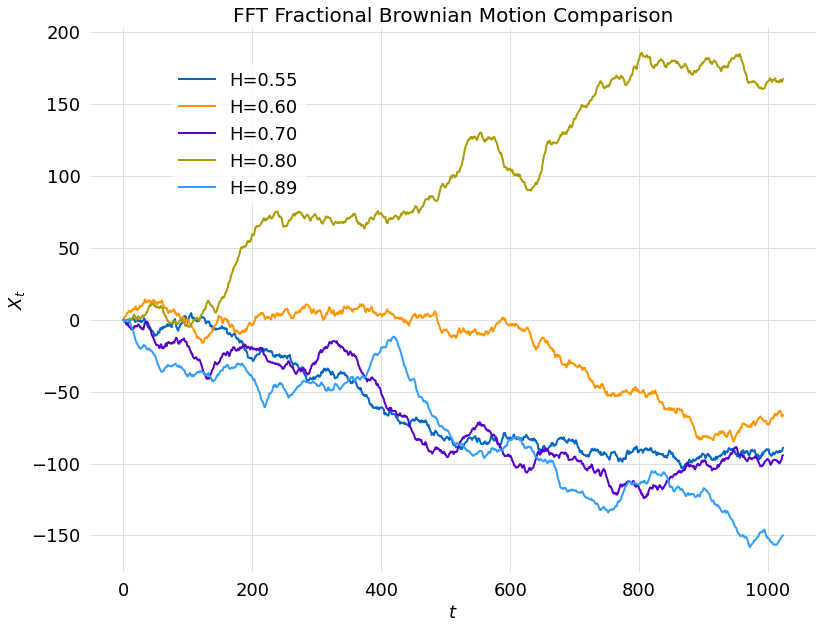

In [14]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"FFT Fractional Brownian Motion Comparison"
plots.comparison(samples, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

In [15]:
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
samples = fft_samples(H_vals, npts)

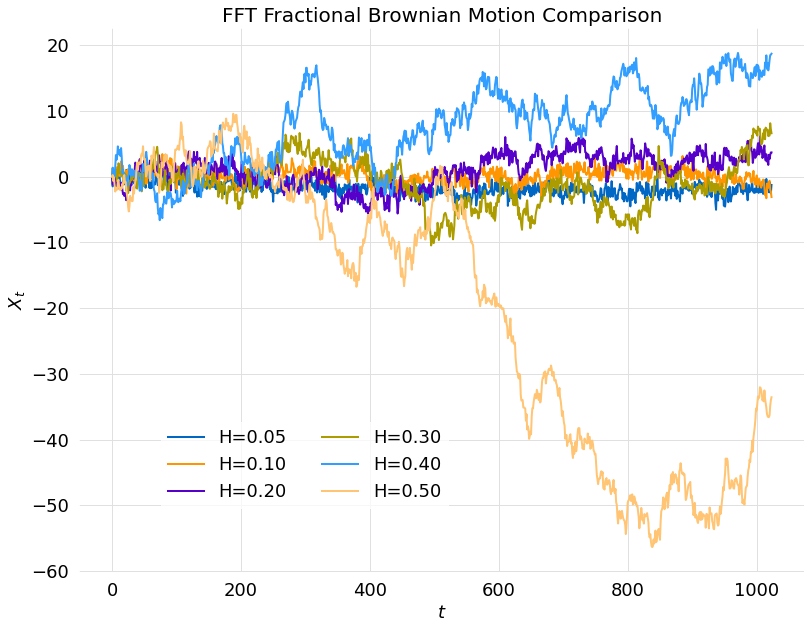

In [16]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"FFT Fractional Brownian Motion Comparison"
plots.comparison(samples, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

### H Near 1
The FFT method has issues for values of H near one. `H=0.91` is the largest value for which a solution can be obtained.</br> The Cholesky method, though slower, can obtain solutions in this range as shown below 

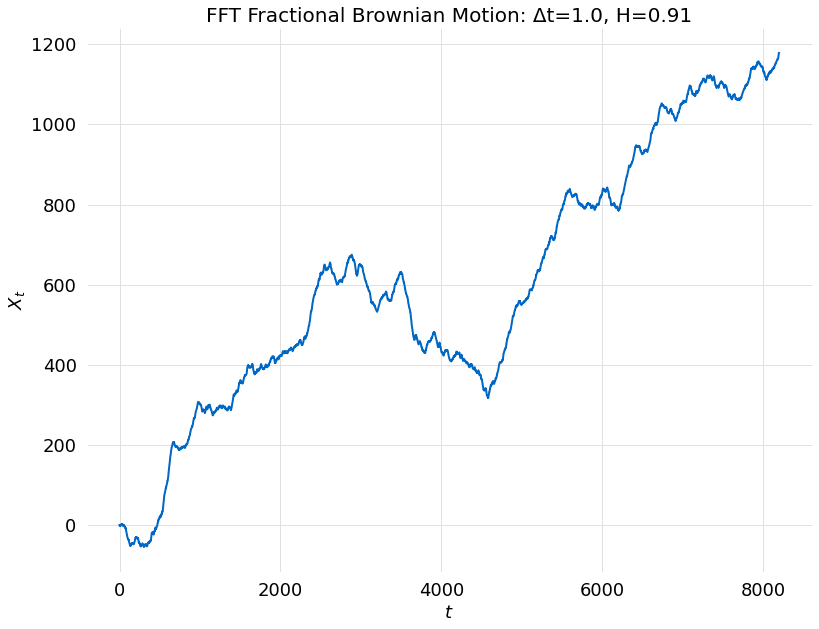

In [21]:
H = 0.91
npts = 8196
samples = fbm.generate_fft(H, npts)
title = f"FFT Fractional Brownian Motion: Δt={Δt}, H={H}"
plots.curve(samples, title=title, data_type=PlotDataType.TIME_SERIES)

In [18]:
npts = 1024
H_vals = [0.9, 0.95, 0.99]
samples = cholesky_samples(H_vals, npts)

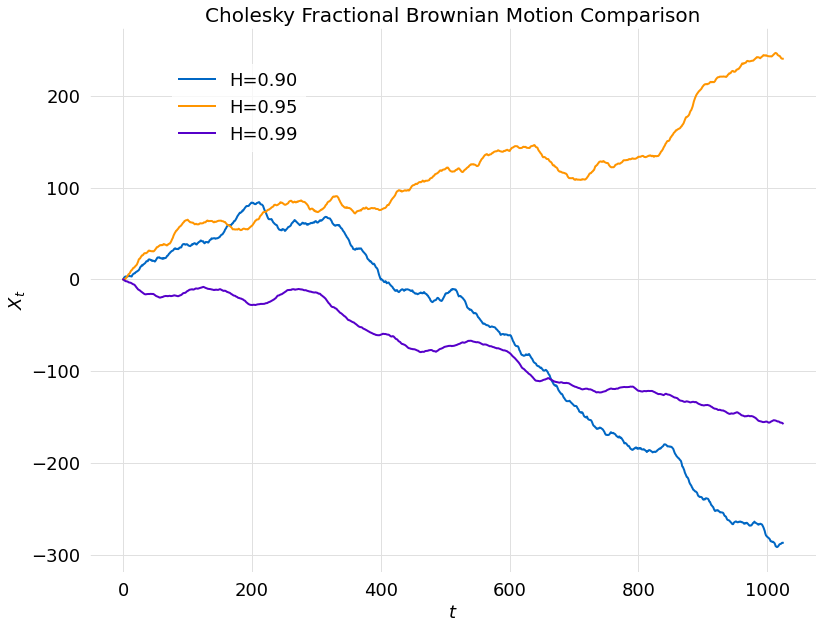

In [19]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.comparison(samples, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)